In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Load dataset again (same structure as training data)
df = pd.read_csv("KL_Property_Listing.csv")

In [31]:
features = df[['Price', 'Built_Size', 'Rooms', 'Bathrooms', 'Car Parks']]

In [32]:
# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [48]:
dbscan = DBSCAN(eps=0.8, min_samples=10)  # You may need to tune eps/min_samples
clusters = dbscan.fit_predict(scaled_features)

In [49]:
df['Cluster'] = clusters

In [50]:
# Count of each cluster
print("Cluster label counts:")
print(df['Cluster'].value_counts())

# Silhouette score (only if more than 1 cluster and no -1-only)
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
if n_clusters > 1:
    score = silhouette_score(scaled_features, clusters)
    print(f"\nSilhouette Score: {score:.2f}")
else:
    print("\nSilhouette Score: Not available (less than 2 clusters)")


Cluster label counts:
Cluster
 2     5028
 6     3649
 4     2443
 3     1241
-1      893
 10     849
 13     834
 15     473
 7      411
 14     398
 11     315
 16     269
 5      228
 12     225
 36     128
 44     111
 29      94
 21      84
 25      84
 23      77
 0       76
 24      70
 28      63
 9       63
 37      51
 30      50
 34      49
 26      48
 22      47
 40      44
 42      41
 35      40
 32      37
 8       33
 27      30
 1       28
 33      27
 17      24
 38      23
 51      23
 20      22
 46      20
 48      18
 18      18
 43      17
 50      16
 41      13
 31      13
 53      12
 52      11
 45      11
 49      11
 19      11
 39      10
 47      10
 55      10
 56      10
 54      10
Name: count, dtype: int64

Silhouette Score: 0.63


In [60]:
# Identify noise points (labeled as -1)
noise_points = df[df['Cluster'] == -1]
print(f"\nNumber of noise points: {len(noise_points)}")


Number of noise points: 893


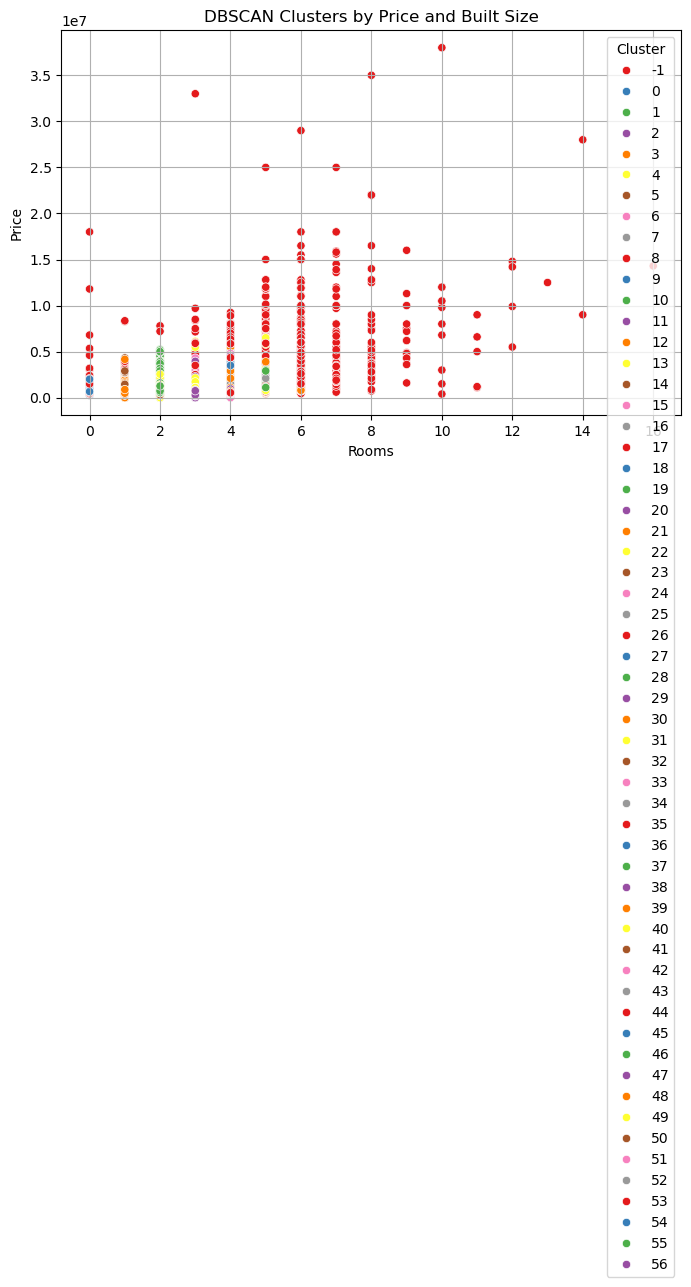

In [61]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Rooms', y='Price', hue='Cluster', palette='Set1')
plt.title('DBSCAN Clusters by Price and Built Size')
plt.grid(True)
plt.show()

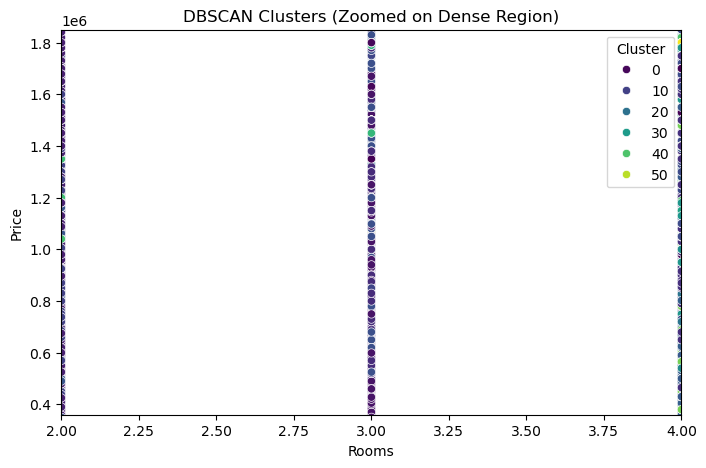

In [62]:

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Rooms', y='Price', hue='Cluster', palette='viridis')

# Set axis limits to zoom in
plt.xlim(df['Rooms'].quantile(0.1), df['Rooms'].quantile(0.9))  # Focus on middle 80%
plt.ylim(df['Price'].quantile(0.1), df['Price'].quantile(0.9))  # Focus on middle 80%

plt.title('DBSCAN Clusters (Zoomed on Dense Region)')
plt.show()

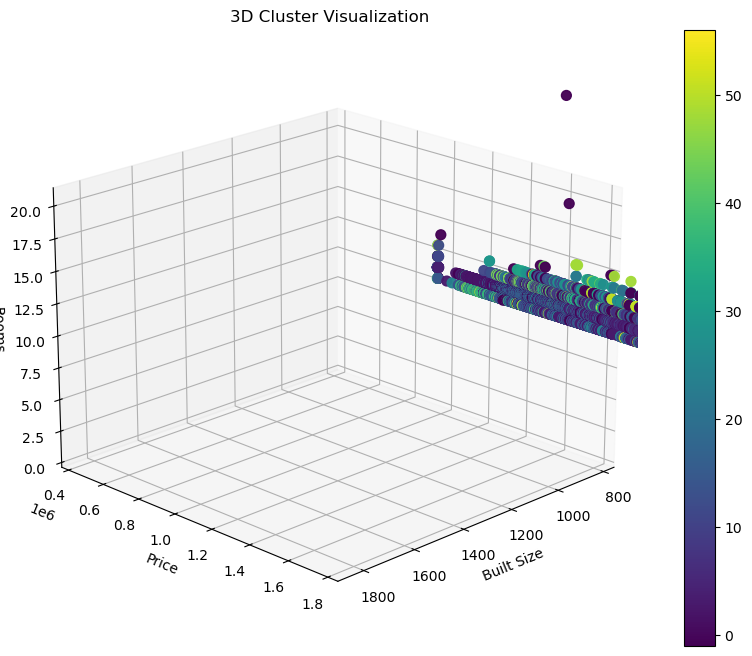

In [63]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Rooms'], df['Price'], df['Bathrooms'], 
                    c=df['Cluster'], cmap='viridis', s=50)

# Set viewing angle and limits
ax.set_xlim(df['Built_Size'].quantile(0.1), df['Built_Size'].quantile(0.9))
ax.set_ylim(df['Price'].quantile(0.1), df['Price'].quantile(0.9))
ax.view_init(elev=20, azim=45)  # Adjust viewing angle

ax.set_xlabel('Built Size')
ax.set_ylabel('Price')
ax.set_zlabel('Rooms')
plt.title('3D Cluster Visualization')
plt.colorbar(scatter)
plt.show()

In [66]:
import pickle

with open('Clustering_Features.pkl', 'wb') as file:
    pickle.dump(dbscan, file)